# Bibliotecas

In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from sympy.interactive import printing
printing.init_printing(use_latex = True)
%matplotlib inline

# Solução exata

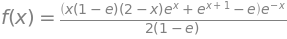

In [2]:
x = Symbol('x')
f = Function('f')(x)
ics = {f.subs(x,0): 0, f.subs(x,1): 0}
ode = Eq(f.diff(x,x) + f.diff(x) + x,0)

fsol = dsolve(ode, f, ics = ics)
fsol.simplify()

In [28]:
f = (x*(1 - exp(1))*(2-x)*exp(x) + exp(x+1)-exp(1) )*exp(-x)/(2*(1-exp(1)))

## DECLARA SIMBOLOS

In [3]:
x, y, C1, C2, C3, C4 = symbols('x y C1 C2 C3 C4')

## POLINOMIOS DE 2º GRAU

In [4]:
y2_ = C1*x*(1-x)

## VALIDAR SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [5]:
print("y(0) = 0: ", y2_.subs(x,0).simplify() == 0)
print("y(1) = 0: ", y2_.subs(x,1).simplify() == 0)

y(0) = 0:  True
y(1) = 0:  True


## DERIVADAS DE y

In [6]:
dy  = y2_.diff(x)
ddy = y2_.diff(x,x)

## RESÍDUO

In [7]:
R   = ddy + dy + x
phi = y2_.diff(C1)

## INTEGRAÇÃO ORTOGONAL

In [8]:
I = integrate(R*phi, (x, 0, 1))

## ENCONTRAR VARIÁVEIS

In [9]:
C1_ = solve(I, C1)

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [10]:
y2 = y2_.subs([(C1,C1_[0])])

## POLINOMIOS DE 3º GRAU

In [11]:
y3 = x*(1-x)*(C1 + C2*x)

## VALIDAR SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [12]:
print("y(0) = 0: ", y3.subs(x,0).simplify() == 0)
print("y(1) = 0: ", y3.subs(x,1).simplify() == 0)

y(0) = 0:  True
y(1) = 0:  True


## DERIVADAS DE y

In [13]:
dy  = y3.diff(x)
ddy = y3.diff(x,x)

## RESÍDUO

In [14]:
R   = ddy + dy + x
phi1 = y3.diff(C1)
phi2 = y3.diff(C2)

## INTEGRAÇÃO ORTOGONAL

In [15]:
I1 = integrate(R*phi1, (x, 0, 1))
I2 = integrate(R*phi2, (x, 0, 1))
system = [I1, I2]
vars = [C1, C2]
sol = solve(system, vars)
C1_ = sol[C1]
C2_ = sol[C2]

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [16]:
y3 = y3.subs([(C1,C1_), (C2,C2_)])

## POLINOMIOS DE 4º GRAU

In [17]:
y4 = C1*x*( 1 - x ) + C2*x**2*( 1 - x ) + C3*x**3*( 1 - x )

## VALIDAR SE TODAS AS CONDIÇÕES DE CONTORNO FORAM SATISFEITAS

In [18]:
print("y(0) = 0: ", y4.subs(x,0).simplify() == 0)
print("y(1) = 0: ", y4.subs(x,1).simplify() == 0)

y(0) = 0:  True
y(1) = 0:  True


## DERIVADAS DE y

In [19]:
dy  = y4.diff(x)
ddy = y4.diff(x,x)

## RESÍDUO

In [20]:
R   = ddy + dy + x
phi1 = y4.diff(C1)
phi2 = y4.diff(C2)
phi3 = y4.diff(C3)

## INTEGRAÇÃO ORTOGONAL

In [21]:
I1 = integrate(R*phi1, (x, 0, 1))
I2 = integrate(R*phi2, (x, 0, 1))
I3 = integrate(R*phi3, (x, 0, 1))
system = [I1, I2, I3]
vars = [C1, C2, C3]
sol = solve(system, vars)
C1_ = sol[C1]
C2_ = sol[C2]
C3_ = sol[C3]

## EQUAÇÃO DA LINHA ELASTICA FINAL

In [22]:
y4 = y4.subs([(C1,C1_), (C2,C2_), (C3,C3_)])

## PLOT

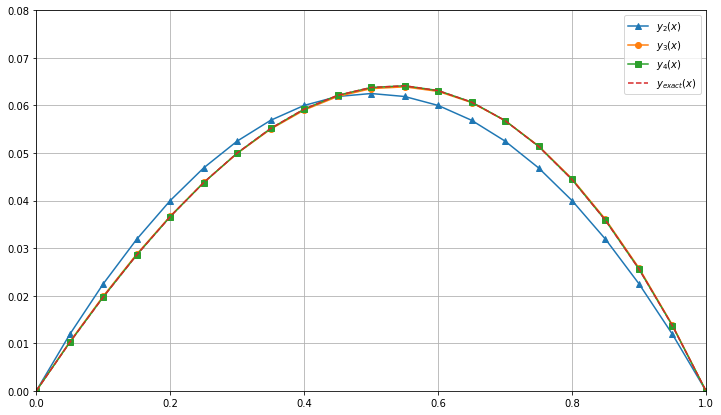

In [30]:
fig, ax = plt.subplots(figsize = (12, 7))

x_range = np.arange(0.0, 1.1, 0.05)

x_2 = list()
y_2 = list()
y_3 = list()
y_4 = list()
y_exact = list()

for i in x_range:
    x_2.append(i)
    value2 = y2.subs([(x, i)])
    y_2.append(value2)
    
    value3 = y3.subs([(x, i)])
    y_3.append(value3)
    
    value4 = y4.subs([(x, i)])
    y_4.append(value4)
    
    value5 = f.subs([(x, i)])
    y_exact.append(value5)
    
plt.plot(x_2, y_2, '-^')
plt.plot(x_2, y_3, '-o')
plt.plot(x_2, y_4, '-s')
plt.plot(x_2, y_exact, '--')
plt.xlim([0, 1])
plt.ylim([0, 0.08])
plt.legend(["$y_2(x)$", "$y_3(x)$", "$y_4(x)$", "$y_{exact}(x)$"])
plt.grid()
plt.show()

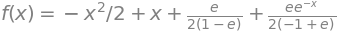

In [25]:
fsol

In [34]:
fsol.subs(x,0)